# Chapter 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlretrieve
import zipfile

# Download and extra chapter 2 data zip files
url = 'https://assets.datacamp.com/production/repositories/3202/datasets/cc496bdfda1d59a462bf7ff3e4117bcd34c76b35/chapter_3.zip'
file = 'chapter_3.zip'
urlretrieve(url, file)

zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [14]:
datamart_rfm = pd.read_csv('datamart_rfm_and_scores.csv')
datamart_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3643 non-null   int64  
 1   Recency        3643 non-null   int64  
 2   Frequency      3643 non-null   int64  
 3   MonetaryValue  3643 non-null   float64
 4   R              3643 non-null   int64  
 5   F              3643 non-null   int64  
 6   M              3643 non-null   int64  
 7   RFM_Segment    3643 non-null   int64  
 8   RFM_Score      3643 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 256.3 KB


**K-Means Assumptions**
* Symmetric distribution
* Variables have same average value 
* Variables with the same variance

In [5]:
data_str = ',var1,var2,var3\n0,137,1.84,2.898\n1,335,0.91,0.687\n2,172,4.104,8.326\n3,355,6.661,1.582\n4,303,15.285,110.75\n5,233,0.175,0.017\n6,244,0.165,0.249\n7,229,0.533,6.938\n8,171,1.221,228.779\n9,337,2.984,0.586\n10,381,1.483,1.098\n11,278,0.08,0.615\n12,376,0.682,17.479\n13,354,2.81,0.539\n14,352,1.333,4.312\n15,256,2.588,0.503\n16,150,0.758,0.065\n17,168,0.778,1.962\n18,315,1.262,2.948\n19,341,1.668,16.1\n20,186,1.281,0.789\n21,241,1.16,0.265\n22,107,0.433,3.351\n23,122,1.602,1.677\n24,101,1.164,1.828\n25,309,4.093,0.855\n26,364,4.463,12.101\n27,316,1.26,2.212\n28,241,0.626,59.898\n29,215,0.451,10.885\n30,221,1.696,4.121\n31,130,1.101,0.03\n32,171,0.651,3.648\n33,149,1.056,2.467\n34,103,0.461,5.712\n35,380,2.389,9.433\n36,143,0.572,0.423\n37,176,4.608,5.874\n38,126,1.654,0.299\n39,209,2.097,66.723\n40,397,0.255,0.057\n41,115,1.235,0.023\n42,164,2.519,0.029\n43,296,0.304,0.148\n44,125,0.717,0.09\n45,326,1.042,66.896\n46,382,0.18,0.496\n47,253,1.482,0.056\n48,204,2.874,10.963\n49,122,0.342,0.284\n50,365,1.549,0.07\n51,295,0.195,6.566\n52,226,0.953,3.817\n53,379,0.133,0.393\n54,255,4.052,20.583\n55,183,1.666,1.32\n56,266,0.97,32.279\n57,236,0.38,2.945\n58,388,4.9,28.488\n59,366,11.638,1.265\n60,379,0.098,0.073\n61,243,4.675,193.078\n62,339,7.62,0.31\n63,187,1.525,0.652\n64,381,0.224,0.222\n65,343,2.936,0.646\n66,174,0.798,1.684\n67,290,0.471,1.543\n68,316,0.216,4.139\n69,251,1.988,47.036\n70,283,2.689,0.772\n71,359,0.459,0.071\n72,353,1.915,0.079\n73,362,0.24,0.239\n74,152,2.72,0.027\n75,102,1.06,5.887\n76,176,0.792,0.343\n77,249,0.881,0.513\n78,303,2.957,0.996\n79,363,2.55,0.05\n80,177,1.936,0.157\n81,300,1.187,4.262\n82,175,1.102,3.778\n83,143,2.163,0.386\n84,120,1.337,48.93\n85,130,2.343,0.06\n86,136,0.679,0.476\n87,363,0.048,0.609\n88,157,3.655,0.002\n89,340,15.312,64.282\n90,310,1.734,2.197\n91,196,0.883,0.106\n92,369,0.843,82.062\n93,110,0.862,3.52\n94,379,1.022,2.517\n95,252,0.247,0.271\n96,302,0.525,1.256\n97,248,0.288,0.038\n98,240,1.364,5.52\n99,293,0.691,0.447\n'
from io import StringIO

data = pd.read_csv(StringIO(data_str), index_col=0)
data

,var1,var2,var3
0,137,1.840,2.898
1,335,0.910,0.687
2,172,4.104,8.326
3,355,6.661,1.582
4,303,15.285,110.750
...,...,...,...
95,252,0.247,0.271
96,302,0.525,1.256
97,248,0.288,0.038
98,240,1.364,5.520


In [6]:
# Print the average values of the variables in the dataset
print(data.mean())

# Print the standard deviation of the variables in the dataset
print(data.std())

# Get the key statistics of the dataset
print(data.describe())

var1    251.85000
var2      1.92559
var3     12.55028
dtype: float64
var1    90.993104
var2     2.583730
var3    34.516362
dtype: float64
             var1       var2        var3
count  100.000000  100.00000  100.000000
mean   251.850000    1.92559   12.550280
std     90.993104    2.58373   34.516362
min    101.000000    0.04800    0.002000
25%    171.750000    0.61250    0.280750
50%    250.000000    1.17550    1.260500
75%    339.250000    2.20800    5.568000
max    397.000000   15.31200  228.779000


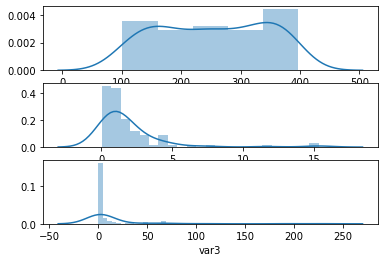

In [8]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(data['var1'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['var2'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['var3'])

# Show the plot
plt.show()

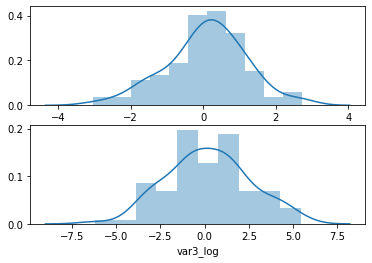

In [9]:
# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])

# Show the plot
plt.show()

## Centre and Scale Variables

In [10]:
# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00   -0.00    0.00     -0.00     -0.00
std      1.00    1.00    1.00      1.00      1.00
min     -1.66   -0.73   -0.36     -2.83     -2.76
25%     -0.88   -0.51   -0.36     -0.52     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.96    0.11   -0.20      0.64      0.64
max      1.60    5.18    6.26      2.39      2.23


In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00    0.00     -0.00     -0.00
std      1.01    1.01    1.01      1.01      1.01
min     -1.67   -0.73   -0.37     -2.85     -2.77
25%     -0.88   -0.51   -0.36     -0.53     -0.64
50%     -0.02   -0.29   -0.33      0.07      0.01
75%      0.97    0.11   -0.20      0.64      0.65
max      1.60    5.21    6.30      2.41      2.24


### Sequence
1. Unskew the data
2. Standardize to the same average
3. Scale to the same standard deviation
4. Store as a separate array

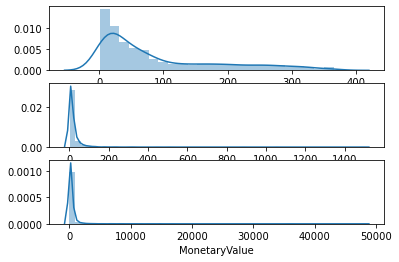

In [16]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

In [18]:
cols = ['Recency', 'Frequency', 'MonetaryValue']

# Unskew the data
datamart_log = np.log(datamart_rfm[cols])

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm[cols].columns)

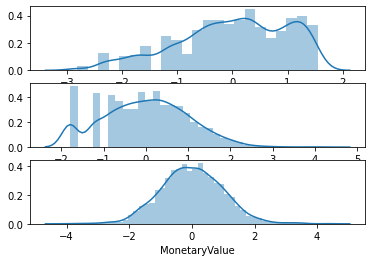

In [19]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()